## Topic modelling and sentiment analysis on the comments on LoFi Hip Hop videos on youtube (Part 2)

Part 2 of this project conducts topic modelling on the obtained comment dataset to see what people on the comment section of lo-fi videos commonly talk about.

### required packages

In [1]:
import numpy as np
import pandas as pd
import re
from tqdm import tqdm

#this funstion suppresses sklearn deprecation warnings 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/youtube_project/comments_en_clean.csv')
df = df.iloc[:,1:]
df = df[df['comment'].notnull()]
df.head(10)

,comment
0,✔️ music free use livestreams videos → httpsbi...
1,january halfway done time another soothing com...
2,study girl chill life days
3,actually planning lofi sound bath thanks inspi...
4,you’re trying rest put device away get well de...
5,literally 99 wont see ever sees good day stay ...
6,everyone whos studying music
7,come need little bit peace let tell please don...
8,tea stayed hot entire time
9,everyone studying don’t worry exam don’t worry...


### Topic modelling

I will first process the dataset by using TF-IDF Vectorization to create a vectorized document term matrix. I will then use the Non-Negative Matrix Factorization (NMF) technique to generate 3 components (topics) with the list of words characteristic of each topic.

In [ ]:
tfidf = TfidfVectorizer()
dtm = tfidf.fit_transform(df['comment'])

In [ ]:
nmf_model = NMF(n_components=3,random_state=42)
nmf_model.fit(dtm)

NMF(n_components=3, random_state=42)

In [ ]:
nmf_topics = []
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    topics = [tfidf.get_feature_names()[i] for i in topic.argsort()[-10:]]
    nmf_topics.append(topics)
    print(topics)
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['song', 'playlist', 'videos', 'community', 'songs', 'cat', 'relaxing', 'much', 'music', 'love']


THE TOP 10 WORDS FOR TOPIC #1
['really', 'like', 'im', 'studying', 'good', 'study', 'thank', 'girl', 'music', 'lofi']


THE TOP 10 WORDS FOR TOPIC #2
['guys', '2021', 'wish', 'hope', 'years', '2022', 'everyone', 'happy', 'new', 'year']




Topic #2 is all about wishing happy new year, most likely because of [this video](https://www.youtube.com/watch?v=n61ULEU7CO0&t=13825s&ab_channel=LofiGirl) that I scraped comments from. <br>
Topic #0 seems to be about the music itself, while Topic #1 is more about studying to the music and thanking the creators. <br>
<br>
Let's also look at what the overall most common words are. (code adapted from [here](https://www.geeksforgeeks.org/generating-word-cloud-python/))

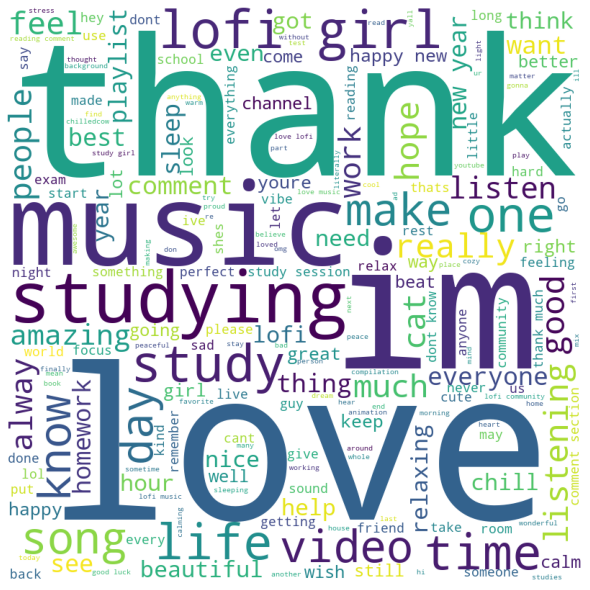

In [ ]:
stopwords = set(STOPWORDS)
comment_words = " ".join(comment for comment in df['comment'])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Again, very positive!

### Sentiment analysis

I will use NLTK's [sentiment/intensity analyzer](https://realpython.com/python-nltk-sentiment-analysis/) to compute the sentiment scores of every comment.

In [14]:
def assign_sentiment(series):
  sia = SentimentIntensityAnalyzer()

  total = []
  negative = []
  neutral = []
  positive = []

  for comment in tqdm(series):
    sent = sia.polarity_scores(comment)
    total.append(sent['compound'])
    negative.append(sent['neg'])
    neutral.append(sent['neu'])
    positive.append(sent['pos'])

  sentiment_dict = {'total': total, 'negative':negative, 'neutral':neutral, 'positive':positive}

  return sentiment_dict

In [ ]:
sentiment_df = pd.DataFrame(data=sentiment_dict)

df = pd.concat([df, sentiment_df], axis=1)
df.head()

,comment,total,negative,neutral,positive
0,✔️ music free use livestreams videos → httpsbi...,0.5106,0.0,0.645,0.355
1,january halfway done time another soothing com...,0.9081,0.0,0.698,0.302
2,study girl chill life days,0.0000,0.0,1.000,0.000
3,actually planning lofi sound bath thanks inspi...,0.7430,0.0,0.442,0.558
4,you’re trying rest put device away get well de...,0.6124,0.0,0.773,0.227


In [ ]:
#export the dataset
df.to_csv('comments_with_sentiment.csv')

In [3]:
#reimport the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/youtube_project/comments_with_sentiment.csv')
df = df.iloc[:,1:]
df.head()

,comment,total,negative,neutral,positive
0,✔️ music free use livestreams videos → httpsbi...,0.5106,0.0,0.645,0.355
1,january halfway done time another soothing com...,0.9081,0.0,0.698,0.302
2,study girl chill life days,0.0000,0.0,1.000,0.000
3,actually planning lofi sound bath thanks inspi...,0.7430,0.0,0.442,0.558
4,you’re trying rest put device away get well de...,0.6124,0.0,0.773,0.227


I will also do the same for another dataset of top-trending youtube videos obtained [here](https://www.kaggle.com/datasnaek/youtube?select=UScomments.csv) (only the first 10,000 comments were extracted). I have taken the same pre-processing steps detailed in Part 1.

In [18]:
df_top = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/youtube_project/UScomments_sm.csv')
df_top = df_top[['comment_text']]
df_top = df_top[df_top['comment_text'].notnull()]
df_top.head()

,comment_text
0,logan paul yo big day ‼️‼️‼️
1,ive following start vine channel seen 365 vlogs
2,say hi kong maverick
3,fan attendance
4,trending 😉


In [20]:
sentiment_df_top = pd.DataFrame(data=assign_sentiment(df_top['comment_text']))

df_top = pd.concat([df_top, sentiment_df_top], axis=1)

df_top.head()

100%|██████████| 9952/9952 [00:02<00:00, 4035.45it/s]


,comment_text,total,negative,neutral,positive
0,logan paul yo big day ‼️‼️‼️,0.0000,0.0,1.000,0.000
1,ive following start vine channel seen 365 vlogs,0.0000,0.0,1.000,0.000
2,say hi kong maverick,0.0000,0.0,1.000,0.000
3,fan attendance,0.3182,0.0,0.303,0.697
4,trending 😉,0.0000,0.0,1.000,0.000


Now, let's compare the scores between the two datasets. As you can see, lo-fi video comments do have a higher positivity score and a lower negativity score than those of other top-trending videos.

In [28]:
print(f"average positivity score of lofi videos is {round(df['positive'].sum() / len(df), 2)}, while that of other trending youtube videos is {round(df_top['positive'].sum() / len(df_top), 2)}.")
print(f"average negativity score of lofi videos is {round(df['negative'].sum() / len(df), 2)}, while that of other trending youtube videos is {round(df_top['negative'].sum() / len(df_top), 2)}.")

average positivity score of lofi videos is 0.34, while that of other trending youtube videos is 0.23.
average negativity score of lofi videos is 0.06, while that of other trending youtube videos is 0.11.


That's it for Part 2!